Load libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import itertools
import keras
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import MinMaxScaler

Using TensorFlow backend.


Load datasets

In [2]:
train = pd.read_csv('input/train.csv')
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)

test = pd.read_csv('input/test.csv')
test = test.select_dtypes(exclude=['object'])
ID = test.Id
test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)

print("")
print("List of features contained our dataset:",list(train.columns))

Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 38)

List of features contained our dataset: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']


Outliers

In [3]:
#clf = IsolationForest(max_samples = 100, random_state = 42)
#clf.fit(train)
#y_noano = clf.predict(train)
#y_noano = pd.DataFrame(y_noano, columns = ['Top'])
#y_noano[y_noano['Top'] == 1].index.values

#train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
#train.reset_index(drop = True, inplace = True)
#print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
#print("Number of rows without outliers:", train.shape[0])



In [4]:
train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


MixMaxScaler()

In [5]:
col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice).reshape((1460,1))

scaler_y = MinMaxScaler()
scaler_y.fit(mat_y)

scaler = MinMaxScaler()
scaler.fit(mat_train)

scaler_test = MinMaxScaler()
scaler_test.fit(mat_new)

train = pd.DataFrame(scaler.transform(mat_train),columns = col_train)
test  = pd.DataFrame(scaler_test.transform(mat_test),columns = col_train_bis)

train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0.235294,0.207668,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50,0.241078
1,0.000000,0.255591,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25,0.203583
2,0.235294,0.217252,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50,0.261908
3,0.294118,0.191693,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00,0.145952
4,0.235294,0.268371,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50,0.298709


In [6]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
training_set.head()

# Training for submission
training_sub = training_set[col_train]

In [7]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
892,0.000000,0.223642,0.033252,0.555556,0.875,0.659420,0.883333,0.00000,0.117470,0.0,...,0.224037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.00,0.166088
1105,0.235294,0.313099,0.051209,0.777778,0.500,0.884058,0.750000,0.22625,0.182849,0.0,...,0.217036,0.058501,0.000000,0.0,0.0,0.0,0.0,0.272727,1.00,0.402861
413,0.058824,0.178914,0.035804,0.444444,0.625,0.398551,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.235507,0.0,0.0,0.0,0.0,0.181818,1.00,0.111235
522,0.176471,0.159744,0.017294,0.555556,0.750,0.543478,0.000000,0.00000,0.070695,0.0,...,0.000000,0.043876,0.065217,0.0,0.0,0.0,0.0,0.818182,0.00,0.172337
1036,0.000000,0.284345,0.054210,0.888889,0.500,0.978261,0.966667,0.04375,0.181077,0.0,...,0.266044,0.000000,0.000000,0.0,0.0,0.0,0.0,0.727273,0.75,0.389668


Deep Neural Network

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import metrics
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=36, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values

model.summary()

history = model.fit(np.array(feature_cols), np.array(labels), epochs=200, batch_size=5)

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               3700      
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 8,801
Trainable params: 8,801
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
482/482 [==============================] - 0s 453us/step - loss: 0.0101
Epoch 2/200
482/482 [==============================] - 0s 306us/step - loss: 0.0050
Epoch 3/200
482/482 [==============================] - 0s 291us/step - loss: 0.0039
Epoch 4/200
482/482 [==============================] - 0s 283us/step - loss: 0.0033
Epoch 5/200
482/482 [=========================

482/482 [==============================] - 0s 257us/step - loss: 5.8848e-04
Epoch 87/200
482/482 [==============================] - 0s 224us/step - loss: 5.9381e-04
Epoch 88/200
482/482 [==============================] - 0s 200us/step - loss: 6.2919e-04
Epoch 89/200
482/482 [==============================] - 0s 210us/step - loss: 5.1186e-04
Epoch 90/200
482/482 [==============================] - 0s 250us/step - loss: 6.6154e-04
Epoch 91/200
482/482 [==============================] - 0s 201us/step - loss: 5.7694e-04
Epoch 92/200
482/482 [==============================] - ETA: 0s - loss: 5.3752e-0 - 0s 411us/step - loss: 5.2360e-04
Epoch 93/200
482/482 [==============================] - 0s 387us/step - loss: 5.5253e-04
Epoch 94/200
482/482 [==============================] - 0s 246us/step - loss: 5.0275e-04
Epoch 95/200
482/482 [==============================] - 0s 203us/step - loss: 5.4673e-04
Epoch 96/200
482/482 [==============================] - 0s 213us/step - loss: 5.5446e-04
Epoch 

482/482 [==============================] - 0s 210us/step - loss: 2.8934e-04
Epoch 177/200
482/482 [==============================] - 0s 243us/step - loss: 3.3177e-04
Epoch 178/200
482/482 [==============================] - 0s 232us/step - loss: 3.2418e-04
Epoch 179/200
482/482 [==============================] - 0s 231us/step - loss: 2.9743e-04
Epoch 180/200
482/482 [==============================] - 0s 188us/step - loss: 2.8240e-04
Epoch 181/200
482/482 [==============================] - 0s 226us/step - loss: 4.2383e-04
Epoch 182/200
482/482 [==============================] - 0s 249us/step - loss: 2.2164e-04
Epoch 183/200
482/482 [==============================] - 0s 248us/step - loss: 3.5561e-04
Epoch 184/200
482/482 [==============================] - 0s 282us/step - loss: 2.8570e-04
Epoch 185/200
482/482 [==============================] - 0s 217us/step - loss: 2.6131e-04
Epoch 186/200
482/482 [==============================] - 0s 259us/step - loss: 3.3521e-04
Epoch 187/200
482/482 [=

In [9]:
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(feature_cols_test))
predictions = list(itertools.islice(y, testing_set.shape[0]))

In [10]:
predictions = scaler_y.inverse_transform(np.array(predictions).reshape(482,1))

In [11]:
reality = testing_set
reality.head()
reality['SalePrice'] = scaler.inverse_transform(reality)[:, [-1]]
reality.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
892,0.000000,0.223642,0.033252,0.555556,0.875,0.659420,0.883333,0.00000,0.117470,0.0,...,0.224037,0.000000,0.000000,0.0,0.0,0.0,0.0,0.090909,0.00,154500.0
1105,0.235294,0.313099,0.051209,0.777778,0.500,0.884058,0.750000,0.22625,0.182849,0.0,...,0.217036,0.058501,0.000000,0.0,0.0,0.0,0.0,0.272727,1.00,325000.0
413,0.058824,0.178914,0.035804,0.444444,0.625,0.398551,0.000000,0.00000,0.000000,0.0,...,0.000000,0.000000,0.235507,0.0,0.0,0.0,0.0,0.181818,1.00,115000.0
522,0.176471,0.159744,0.017294,0.555556,0.750,0.543478,0.000000,0.00000,0.070695,0.0,...,0.000000,0.043876,0.065217,0.0,0.0,0.0,0.0,0.818182,0.00,159000.0
1036,0.000000,0.284345,0.054210,0.888889,0.500,0.978261,0.966667,0.04375,0.181077,0.0,...,0.266044,0.000000,0.000000,0.0,0.0,0.0,0.0,0.727273,0.75,315500.0


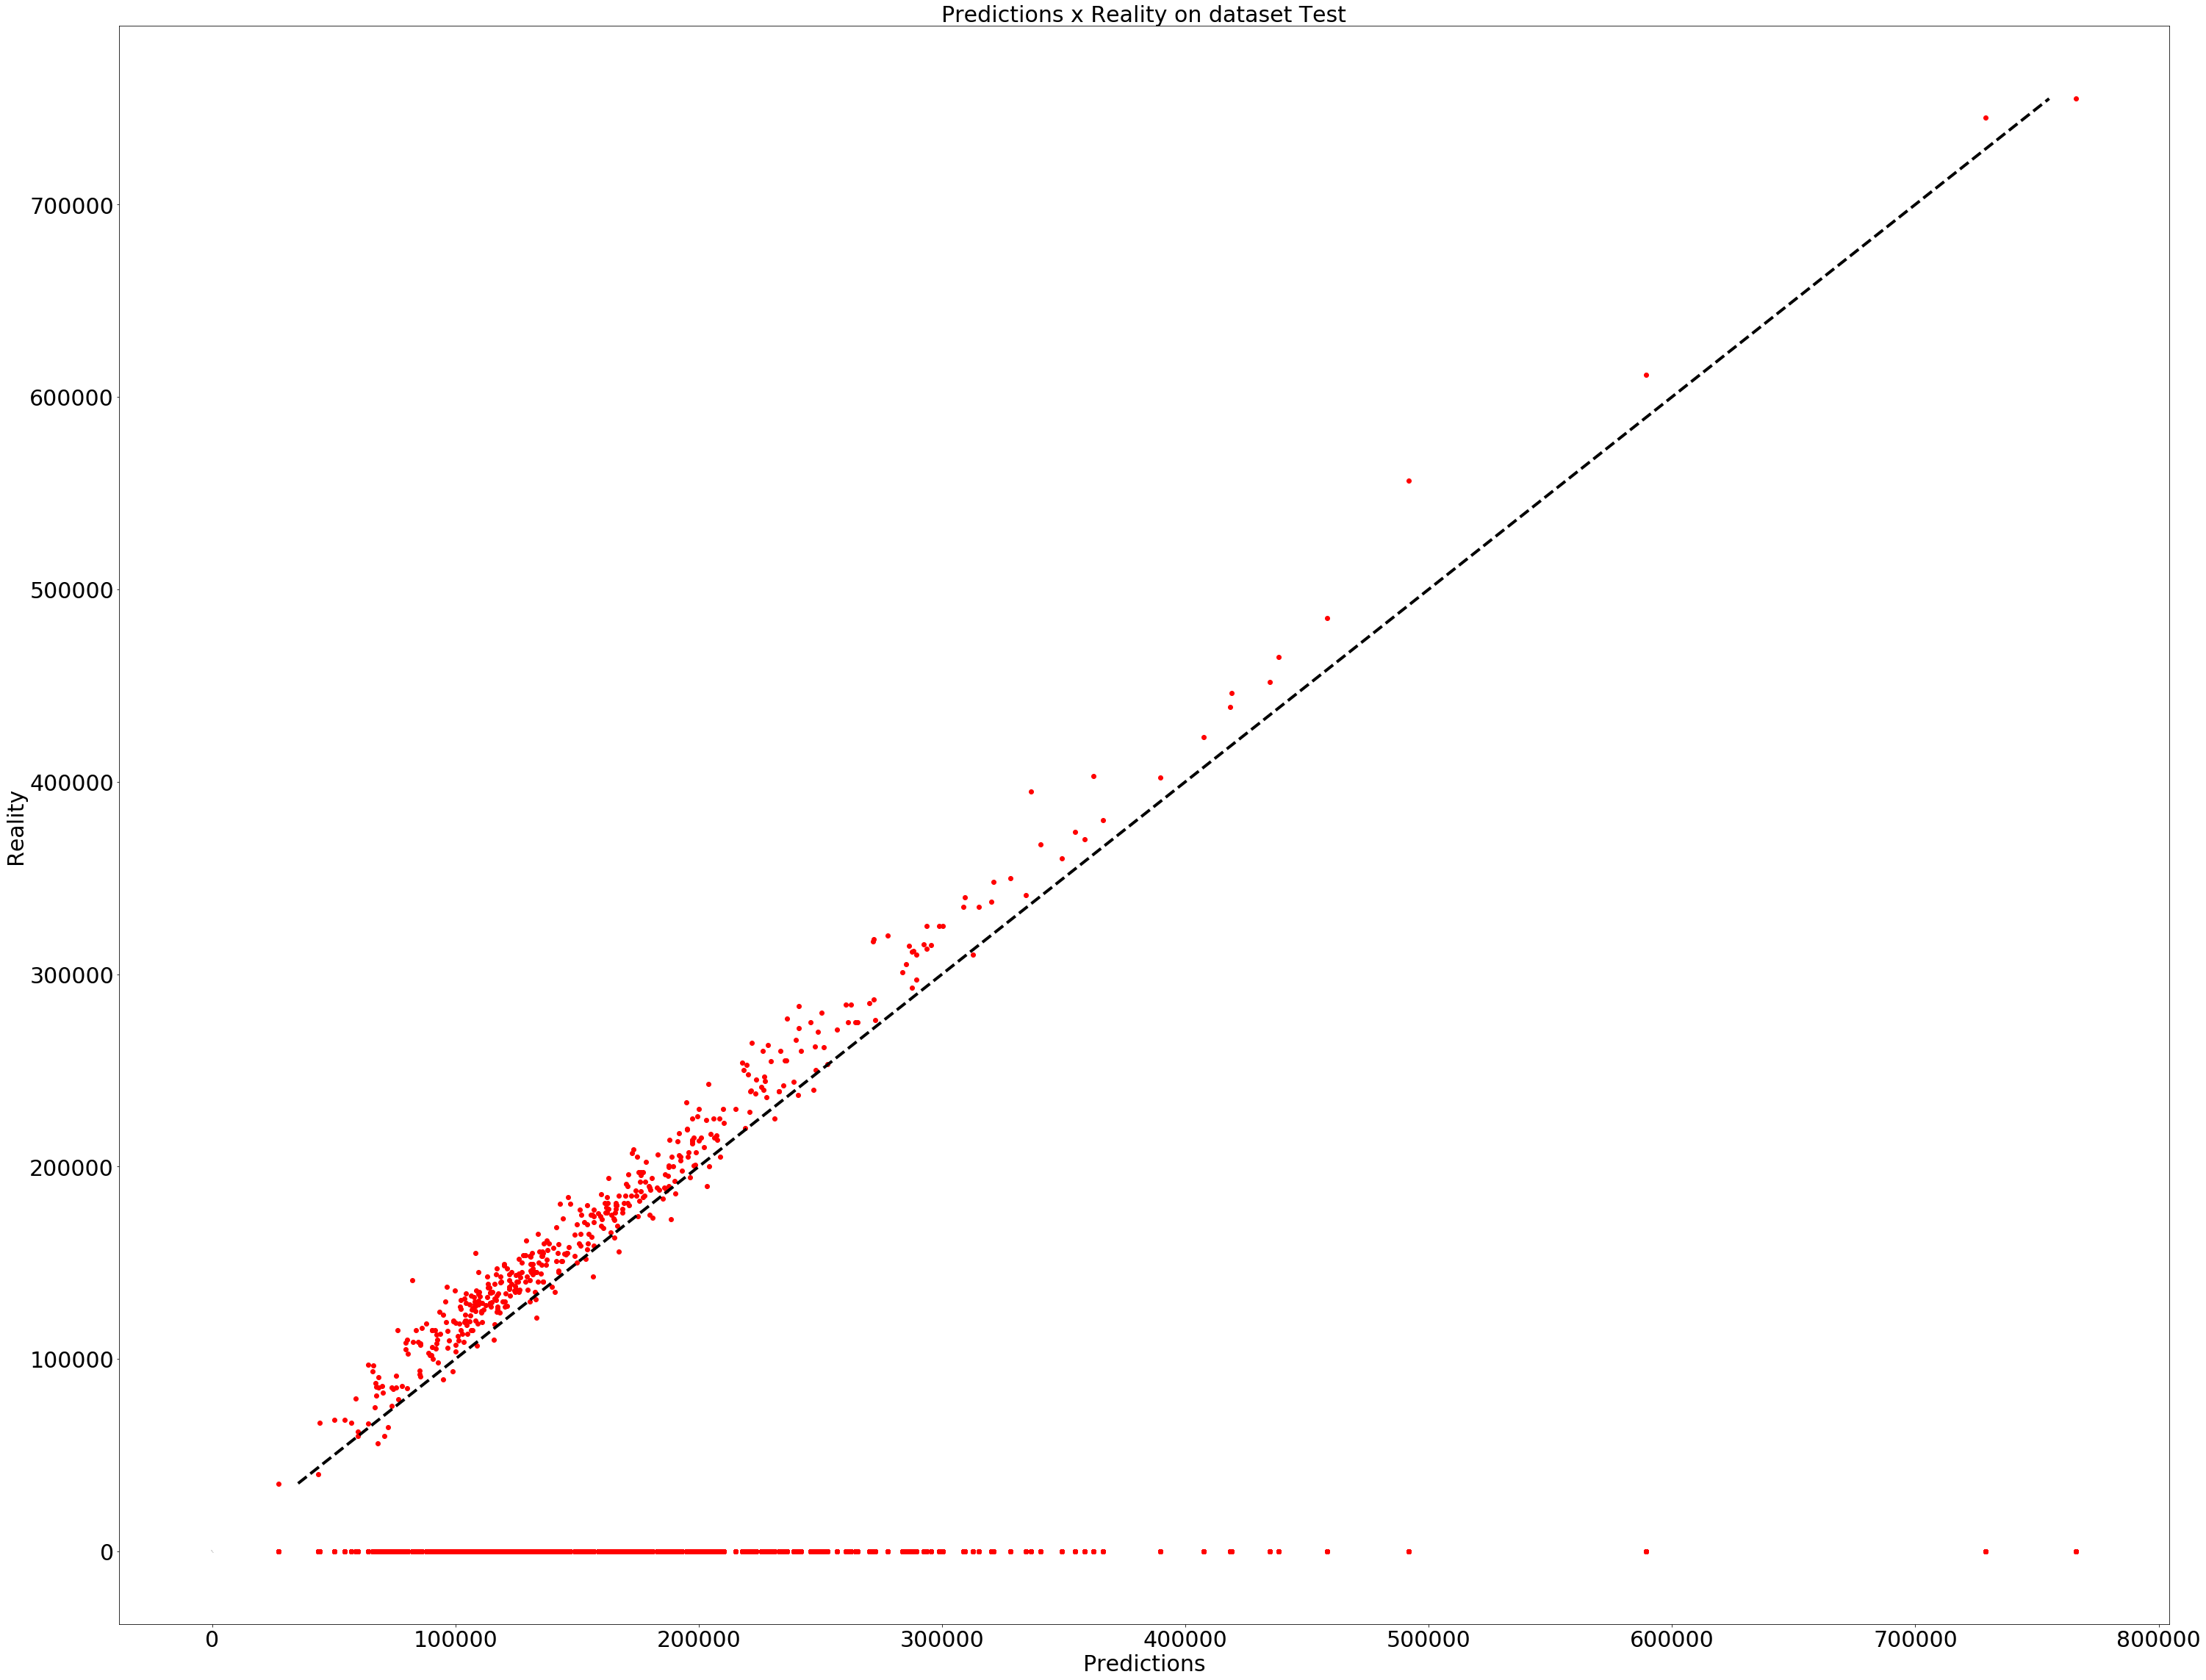

In [12]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions, reality, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

In [13]:
!pip install kaggle

In [14]:
import kaggle

y_predict = model.predict(np.array(test))

def to_submit(pred_y,name_out):
    y_predict = list(itertools.islice(pred_y, test.shape[0]))
    y_predict = pd.DataFrame(scaler_y.inverse_transform(np.array(y_predict).reshape(len(y_predict),1)), columns = ['SalePrice'])
    y_predict = y_predict.join(ID)
    y_predict.to_csv(name_out + '.csv',index=False)
    
to_submit(y_predict, "submission_keras")

submission_file = 'submission_keras.csv'
kaggle.api.competition_submit(submission_file, "Submission Keras", "house-prices-advanced-regression-techniques")

100%|██████████| 21.1k/21.1k [00:03<00:00, 6.64kB/s]


Successfully submitted to House Prices: Advanced Regression Techniques